In [551]:
import pandas as pd
import csv
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
source = "https://raw.githubusercontent.com/LauraDanielamg/TechnicalTestBipiCSV/main/Customers.csv"

# Prueba técnica para Bipicar.com
---
## Instrucciones/preguntas:

Dado el [dataset](https://github.com/LauraDanielamg/TechnicalTestBipiCSV/blob/main/Customers.csv) que se adjunta, contestar las siguientes preguntas:

### - ¿Qué método de pandas utilizarías para cargar la información en un dataframe?

In [552]:
df = pd.read_csv(source)
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


### - ¿Qué alternativa a pandas podrías utilizar?

Se puede recurrir al módulo *csv* y a la función *urlopen*:

In [553]:
with urlopen(source) as csvfile:
    reader = csv.reader(csvfile.read().decode('utf-8').splitlines())
    content = [row for row in reader]
for row in content:
    print(row)

['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']
['1', 'Male', '19', '15000', '39', 'Healthcare', '1', '4']
['2', 'Male', '21', '35000', '81', 'Engineer', '3', '3']
['3', 'Female', '20', '86000', '6', 'Engineer', '1', '1']
['4', 'Female', '23', '59000', '77', 'Lawyer', '0', '2']
['5', 'Female', '31', '38000', '40', 'Entertainment', '2', '6']
['6', 'Female', '22', '58000', '76', 'Artist', '0', '2']
['7', 'Female', '35', '31000', '6', 'Healthcare', '1', '3']
['8', 'Female', '23', '84000', '94', 'Healthcare', '1', '3']
['9', 'Male', '64', '97000', '3', 'Engineer', '0', '3']
['10', 'Female', '30', '98000', '72', 'Artist', '1', '4']
['11', 'Male', '67', '7000', '14', 'Engineer', '1', '3']
['12', 'Female', '35', '93000', '99', 'Healthcare', '4', '4']
['13', 'Female', '58', '80000', '15', 'Executive', '0', '5']
['14', 'Female', '24', '91000', '77', 'Lawyer', '1', '1']
['15', 'Male', '37', '19000', '13', 'Doctor', '0

O usar PySpark ;)

### - ¿Qué procedimientos harías para hacer una limpieza de los datos?

Tomaría varios pasos:

- Manejar los valores faltantes.
- Verificar duplicados.
- Verificar que los datos estén en los formatos correctos.
- Normalización y estandarización.

Este dataset esta bastante limpio, sin embargo, podemos hacer algunas comprobaciones:

In [554]:
data_types = df.dtypes
print(data_types)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object


In [555]:
if df.duplicated().any():
    print('Hay valores duplicados en el DataFrame')
else:
    print('No hay valores duplicados en el DataFrame')

No hay valores duplicados en el DataFrame


In [556]:
if df.isnull().any().any():
    print('Hay valores faltantes en el DataFrame')
else:
    print('No hay valores faltantes en el DataFrame')

Hay valores faltantes en el DataFrame


In [557]:
unique_values = df['Gender'].unique()
print(unique_values)

['Male' 'Female']


In [558]:
unique_values = df['Profession'].unique()
print(unique_values)

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]


In [559]:
df['Profession'] = df['Profession'].fillna("N/A")

In [560]:
if df.isnull().any().any():
    print('Hay valores faltantes en el DataFrame')
else:
    print('No hay valores faltantes en el DataFrame')

No hay valores faltantes en el DataFrame


Por supuesto tambien debemos verificar la coherencia:

Por ejemplo:


### Escribe un script en Python apoyado en pandas y en cualquier librería de graficación que conozcas que en tiempo de ejecución realice lo siguiente:

1. Calcular el número y porcentaje sobre el total absoluto de Mujeres monoparentales que han gastado más de 15.000 dólares:

In [561]:
df['Annual Spending'] = df['Spending Score (1-100)'] * df['Annual Income ($)'] * 100 #Calculamos Annual Spending

df['Annual Spending']#%%
import pandas as pd
import csv
from urllib.request import urlopen
import matplotlib.pyplot as plt
source = "https://raw.githubusercontent.com/LauraDanielamg/TechnicalTestBipiCSV/main/Customers.csv"

# Prueba técnica para Bipicar.com
---
## Instrucciones/preguntas:

Dado el [dataset](https://github.com/LauraDanielamg/TechnicalTestBipiCSV/blob/main/Customers.csv) que se adjunta, contestar las siguientes preguntas:

### - ¿Qué método de pandas utilizarías para cargar la información en un dataframe?

In [562]:
df = pd.read_csv(source)
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


### - ¿Qué alternativa a pandas podrías utilizar?

Se puede recurrir al módulo *csv* y a la función *urlopen*:

In [563]:
with urlopen(source) as csvfile:
    reader = csv.reader(csvfile.read().decode('utf-8').splitlines())
    content = [row for row in reader]
for row in content:
    print(row)

['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']
['1', 'Male', '19', '15000', '39', 'Healthcare', '1', '4']
['2', 'Male', '21', '35000', '81', 'Engineer', '3', '3']
['3', 'Female', '20', '86000', '6', 'Engineer', '1', '1']
['4', 'Female', '23', '59000', '77', 'Lawyer', '0', '2']
['5', 'Female', '31', '38000', '40', 'Entertainment', '2', '6']
['6', 'Female', '22', '58000', '76', 'Artist', '0', '2']
['7', 'Female', '35', '31000', '6', 'Healthcare', '1', '3']
['8', 'Female', '23', '84000', '94', 'Healthcare', '1', '3']
['9', 'Male', '64', '97000', '3', 'Engineer', '0', '3']
['10', 'Female', '30', '98000', '72', 'Artist', '1', '4']
['11', 'Male', '67', '7000', '14', 'Engineer', '1', '3']
['12', 'Female', '35', '93000', '99', 'Healthcare', '4', '4']
['13', 'Female', '58', '80000', '15', 'Executive', '0', '5']
['14', 'Female', '24', '91000', '77', 'Lawyer', '1', '1']
['15', 'Male', '37', '19000', '13', 'Doctor', '0

O usar PySpark ;)

### - ¿Qué procedimientos harías para hacer una limpieza de los datos?

Tomaría varios pasos:

- Manejar los valores faltantes.
- Verificar duplicados.
- Verificar que los datos estén en los formatos correctos.
- Normalización y estandarización.

Este dataset esta bastante limpio, sin embargo, podemos hacer algunas comprobaciones:

In [564]:
data_types = df.dtypes
print(data_types)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object


In [565]:
if df.duplicated().any():
    print('Hay valores duplicados en el DataFrame')
else:
    print('No hay valores duplicados en el DataFrame')

No hay valores duplicados en el DataFrame


In [566]:
if df.isnull().any().any():
    print('Hay valores faltantes en el DataFrame')
else:
    print('No hay valores faltantes en el DataFrame')

Hay valores faltantes en el DataFrame


In [567]:
unique_values = df['Gender'].unique()
print(unique_values)

['Male' 'Female']


In [568]:
unique_values = df['Profession'].unique()
print(unique_values)

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]


In [569]:
df['Profession'] = df['Profession'].fillna("N/A")

In [570]:
if df.isnull().any().any():
    print('Hay valores faltantes en el DataFrame')
else:
    print('No hay valores faltantes en el DataFrame')

No hay valores faltantes en el DataFrame


Por supuesto, también debemos verificar la coherencia:

Por ejemplo:


### Escribe un script en Python apoyado en pandas y en cualquier librería de graficación que conozcas que en tiempo de ejecución realice lo siguiente:

1. Calcular el número y porcentaje sobre el total absoluto de Mujeres monoparentales que han gastado más de 15.000 dólares:
* Primero tenemos que calcular el gasto anual:

In [571]:
df['Annual Spending'] = df['Spending Score (1-100)'] * df['Annual Income ($)'] / 100

* Luego, si entendemos que el *Family Size* es un indicativo del tamaño de la unidad familiar y que *todas las mujeres con un Family Size igual a 1 son monoparentales*, filtramos por estos criterios y calculamos cantidad de mujeres monoparentales

In [572]:
females = df['Gender'] == 'Female'
single_parent = df['Family Size'] == 1 #Entendemos que el Family Size == Número de hijos
annual_spending_over_15K = df['Annual Spending'] > 15000
annual_spending_under_15K = df['Annual Spending'] < 15000

In [573]:
df_females_single_parents = df[females & single_parent]
total_females_single_parents = len(df_females_single_parents)
print("Mujeres monoparentales: ", total_females_single_parents)

Mujeres monoparentales:  177


* Tambien nos interesa la cantidad de mujeres monoparentales que gastan más de 15K

In [574]:
df_females_single_parents_over_15k = df[females & single_parent & annual_spending_over_15K]
num_females_single_parents_over_15k = len(df_females_single_parents_over_15k)

print("Mujeres monoparentales que han gastado más de 15.000 dólares: ", num_females_single_parents_over_15k)

Mujeres monoparentales que han gastado más de 15.000 dólares:  144


* Comparamos los gastos entre mujeres monoparentales

In [575]:
df_females_single_parents_under_15k = df[females & single_parent & annual_spending_under_15K]
num_females_single_parents_under_15k = len(df_females_single_parents_under_15k)

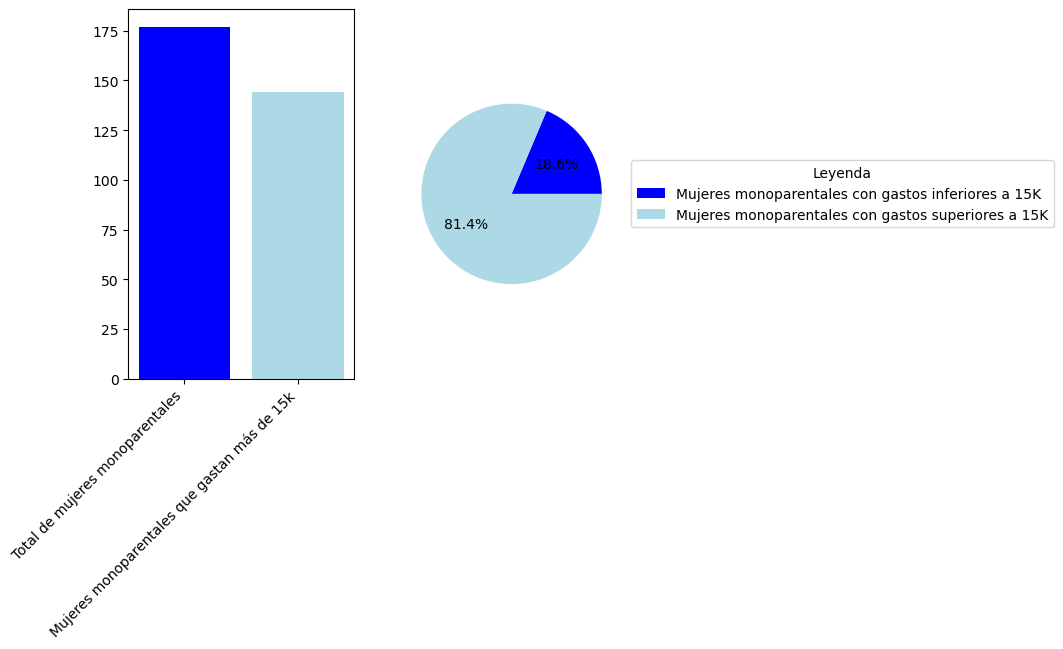

<Figure size 1200x800 with 0 Axes>

In [576]:
datos = [total_females_single_parents, num_females_single_parents_over_15k]
etiquetas = ['Total de mujeres monoparentales', 'Mujeres monoparentales que gastan más de 15k']
colores = ['blue', 'lightblue']

# Crear una figura y dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig = plt.figure(figsize=(12, 8))

#Grafico de barras
ax1.bar(etiquetas, datos, color=colores)
ax1.set_xticks(np.arange(len(etiquetas)))
ax1.set_xticklabels(etiquetas, rotation=45, ha='right')

# Gráfico de pie
datos_pie = [num_females_single_parents_under_15k, num_females_single_parents_15k]
labels = ["Mujeres monoparentales con gastos inferiores a 15K", "Mujeres monoparentales con gastos superiores a 15K"]
ax2.pie(datos_pie,  colors = colores, autopct='%1.1f%%')
ax2.legend(title='Leyenda', labels = labels , loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustar la disposición de los subplots
fig.tight_layout()

# Mostrar la figura completa
plt.show()

* Y el porcentaje de mujeres monoparentales con gastos sobre 15K sobre el total clientes:

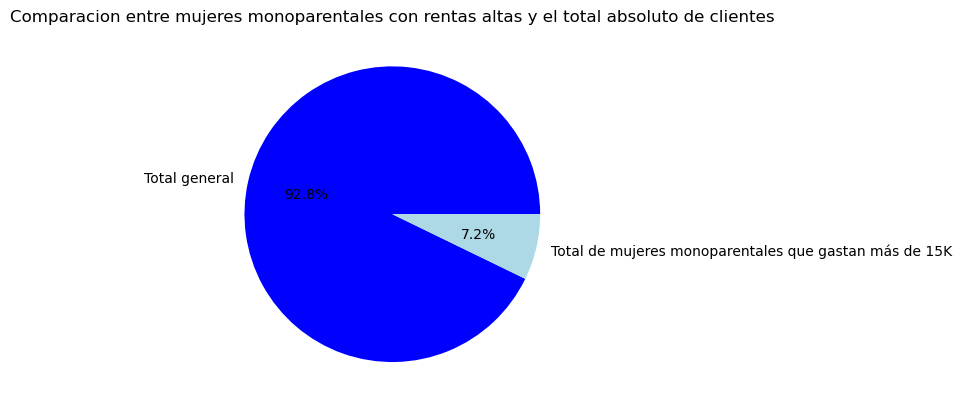

In [577]:
df_non_female_single_parent_over_15k = females & single_parent & annual_spending_over_15K
df_non_female_single_parent_over_15k = df_non_female_single_parent_over_15k.apply(lambda x: not x)
df_non_female_single_parent_over_15k = df[df_non_female_single_parent_over_15k]

general_total_not_female_single_parent_over_15k = len(df_non_female_single_parent_over_15k)

plt.pie([general_total_not_female_single_parent_over_15k, num_females_single_parents_over_15k], labels=["Total general", "Total de mujeres monoparentales que gastan más de 15K"],colors=colores, autopct='%1.1f%%')
plt.title('Comparacion entre mujeres monoparentales con rentas altas y el total absoluto de clientes')
plt.show()

2. Calcular cuántos abogados (M/F) hay en el dataset que tengan mayor experiencia laboral que la media de ingenieros hombres.

In [578]:
mean_exp_eng_male = df.loc[(df['Profession'] == 'Engineer') & (df['Gender'] == 'Male'), 'Work Experience'].mean()

In [579]:
df_lawyers = df.loc[df['Profession'] == 'Lawyer']
df_lawyers_above_mean_exp = df_lawyers.loc[df_lawyers['Work Experience'] > mean_exp_eng_male]
num_lawyers_above_mean_exp = len(df_lawyers_above_mean_exp)
num_lawyers_male_above_mean_exp = len(df_lawyers_above_mean_exp.loc[df_lawyers_above_mean_exp['Gender'] == 'Male'])
num_lawyers_female_above_mean_exp = len(df_lawyers_above_mean_exp.loc[df_lawyers_above_mean_exp['Gender'] == 'Female'])

print("Número de abogados (M/F) con experiencia laboral mayor que la media de ingenieros hombres: ", num_lawyers_above_mean_exp)
print("Número de abogados masculinos con experiencia laboral mayor que la media de ingenieros hombres: ", num_lawyers_male_above_mean_exp)
print("Número de abogados femeninos con experiencia laboral mayor que la media de ingenieros hombres: ", num_lawyers_female_above_mean_exp)

Número de abogados (M/F) con experiencia laboral mayor que la media de ingenieros hombres:  58
Número de abogados masculinos con experiencia laboral mayor que la media de ingenieros hombres:  25
Número de abogados femeninos con experiencia laboral mayor que la media de ingenieros hombres:  33


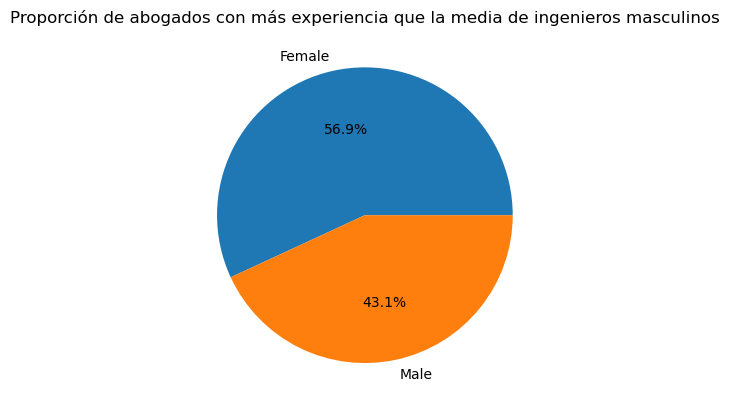

In [580]:
mean_engineer_experience = df[(df['Profession'] == 'Engineer') & (df['Gender'] == 'Male')]['Work Experience'].mean()
# Filtrar los abogados que tienen una experiencia laboral mayor que la media de los ingenieros masculinos
lawyers = df[(df['Profession'] == 'Lawyer') & (df['Work Experience'] > mean_engineer_experience)]

# Contar la cantidad de abogados masculinos y femeninos que cumplen con los criterios anteriores
lawyers_count = lawyers['Gender'].value_counts()

# Crear el gráfico circular
plt.pie(lawyers_count, labels=lawyers_count.index, autopct='%1.1f%%')
plt.title('Proporción de abogados con más experiencia que la media de ingenieros masculinos')
plt.show()

3. Dibuja la distribución de abogados en función de su gasto anual (utiliza franjas de gasto) y de su sexo.

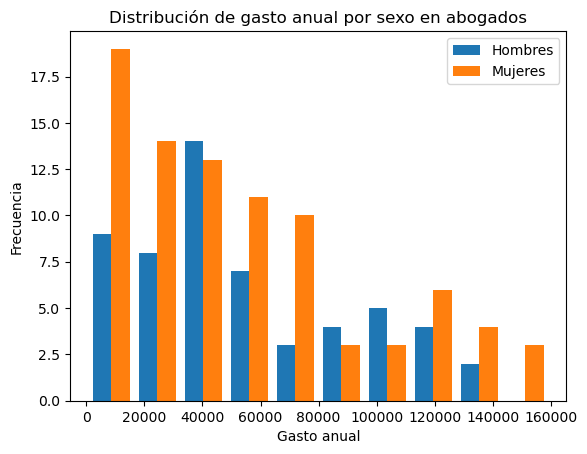

In [581]:
# Filtramos el dataframe por la profesión de abogado
df_abogados = df[df['Profession'] == 'Lawyer']

# Creamos el histograma de gasto anual para hombres y mujeres abogados
plt.hist([df_abogados[df_abogados['Gender'] == 'Male']['Annual Spending'], df_abogados[df_abogados['Gender'] == 'Female']['Annual Spending']],
         bins=10,
         label=['Hombres', 'Mujeres'])

# Añadimos leyenda y título al gráfico
plt.legend()
plt.title('Distribución de gasto anual por sexo en abogados')
plt.xlabel('Gasto anual')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()

In [582]:
plt.scatter(df_abogados[df_abogados['Gender'] == 'Male']['Gender'], df_abogados[df_abogados['Gender'] == 'Male']['Anual Speding'], label='Hombres')
plt.scatter(df_abogados[df_abogados['Gender'] == 'Female']['Gender'], df_abogados[df_abogados['Gender'] == 'Female']['Anual Speding'], label='Mujeres')
plt.title('Gasto anual vs. género en Abogados')
plt.xlabel('Género')
plt.ylabel('Gasto anual')
plt.legend()
plt.show()

KeyError: 'Anual Speding'

In [ ]:
plt.boxplot([df_abogados[df_abogados['Gender'] == 'Male']['Anual Speding'], df_abogados[df_abogados['Gender'] == 'Female']['Anual Speding']])
plt.title('Gasto anual por género en abogados')
plt.xticks([1, 2], ['Hombres', 'Mujeres'])
plt.ylabel('Gasto anual')
plt.show()

4. Añade algún análisis que creas que puede ser interesante explicando por pantalla el resultado del mismo.

In [ ]:
df_females_single_parents = df[(df['Gender'] == 'Female') & (df['Family Size'] == 1)] #Entendemos que el Family Size == Número de hijos

df_females_single_parents_15k = df_females_single_parents[df_females_single_parents['Annual Spending'] > 15000]

num_females_single_parents_15k = len(df_females_single_parents_15k)

total_females_single_parents = len(df_females_single_parents)

percentage_females_single_parents_15k = round(num_females_single_parents_15k / total_females_single_parents * 100, 2)

print("Numero de mujeres monoparentales ", total_females_single_parents)
print("Número de mujeres monoparentales que han gastado más de 15.000 dólares: ", num_females_single_parents_15k)
print("Porcentaje sobre el total absoluto de mujeres monoparentales: ", percentage_females_single_parents_15k, "%")


datos = [total_females_single_parents, num_females_single_parents_15k]
etiquetas = ['Número total', 'Número de mujeres que gastan más de 15k']
colores = ['blue', 'lightblue']
plt.bar(etiquetas, datos, color=colores)
#plt.title('Mujeres monoparentales que han gastado más de 15.000 dólares')
plt.ylabel('Muejer monoparentales')
plt.show()

2. Calcular cuántos abogados (M/F) hay en el dataset que tengan mayor experiencia laboral que la media de ingenieros hombres.

In [ ]:
mean_exp_eng_male = df.loc[(df['Profession'] == 'Engineer') & (df['Gender'] == 'Male'), 'Work Experience'].mean()

In [ ]:
df_lawyers = df.loc[df['Profession'] == 'Lawyer']
df_lawyers_above_mean_exp = df_lawyers.loc[df_lawyers['Work Experience'] > mean_exp_eng_male]
num_lawyers_above_mean_exp = len(df_lawyers_above_mean_exp)
num_lawyers_male_above_mean_exp = len(df_lawyers_above_mean_exp.loc[df_lawyers_above_mean_exp['Gender'] == 'Male'])
num_lawyers_female_above_mean_exp = len(df_lawyers_above_mean_exp.loc[df_lawyers_above_mean_exp['Gender'] == 'Female'])

print("Número de abogados (M/F) con experiencia laboral mayor que la media de ingenieros hombres: ", num_lawyers_above_mean_exp)
print("Número de abogados masculinos con experiencia laboral mayor que la media de ingenieros hombres: ", num_lawyers_male_above_mean_exp)
print("Número de abogados femeninos con experiencia laboral mayor que la media de ingenieros hombres: ", num_lawyers_female_above_mean_exp)

3. Dibuja la distribución de abogados en función de su gasto anual (utiliza franjas de gasto) y de su sexo.

In [ ]:
# Filtramos el dataframe por la profesión de abogado
df_abogados = df[df['Profession'] == 'Lawyer']

# Creamos el histograma de gasto anual para hombres y mujeres abogados
plt.hist([df_abogados[df_abogados['Gender'] == 'Male']['Anual Speding'], df_abogados[df_abogados['Gender'] == 'Female']['Anual Speding']],
         bins=10,
         label=['Hombres', 'Mujeres'])

# Añadimos leyenda y título al gráfico
plt.legend()
plt.title('Distribución de gasto anual por sexo en abogados')
plt.xlabel('Gasto anual')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()

In [ ]:
plt.scatter(df_abogados[df_abogados['Gender'] == 'Male']['Gender'], df_abogados[df_abogados['Gender'] == 'Male']['Anual Speding'], label='Hombres')
plt.scatter(df_abogados[df_abogados['Gender'] == 'Female']['Gender'], df_abogados[df_abogados['Gender'] == 'Female']['Anual Speding'], label='Mujeres')
plt.title('Gasto anual vs. género en Abogados')
plt.xlabel('Género')
plt.ylabel('Gasto anual')
plt.legend()
plt.show()

In [ ]:
plt.boxplot([df_abogados[df_abogados['Gender'] == 'Male']['Anual Speding'], df_abogados[df_abogados['Gender'] == 'Female']['Anual Speding']])
plt.title('Gasto anual por género en abogados')
plt.xticks([1, 2], ['Hombres', 'Mujeres'])
plt.ylabel('Gasto anual')
plt.show()

4. Añade algún análisis que creas que puede ser interesante explicando por pantalla el resultado del mismo.
